# Wrangle and Analyze Data

## Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### The Data
### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

### Image Predictions File
One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


In [51]:
import pandas as pd 
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline
import matplotlib.pyplot as plt

## Gather

#### The WeRateDogs Twitter archive

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

#### The tweet image predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [4]:
df_image=pd.read_csv('image-predictions.tsv',sep='\t')

#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [5]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)


2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

####  read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [8]:
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

## Assess

In [9]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
sum(df_1['tweet_id'].duplicated())

0

In [12]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
sum(df_image.jpg_url.duplicated())

66

In [15]:
print(df_image.p1_dog.value_counts())
print(df_image.p2_dog.value_counts())
print(df_image.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [16]:
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [17]:
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [18]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [19]:
sum(df_tweet_json.tweet_id.duplicated())

0

### Quality issues:
*df_1:*

* timestamp and retweeted_status_timestamp are of type 'object'
* remove columns that are not needed for analysis 
* delete retweets

*df_image_clean:*

* missing data (2075 rows instead of 2356)
* remove duplicated rows of jpg_url
* p1,p2,p3 inconsistent capitalication (sometimes first letter is capital)

*df_tweet_json_clean:*

* missing data (2354 rows instead of 2356)
* convert tweet_id into int64

### Tidiness issues:
* Three data frames should be combined in one data frame since they all describe one tweet 

*df_1:*

* one variable in four columns(doggo,floofer, pupper, and puppo)




## Clean

In [20]:
# make copies of dataframes to clean
df_1_clean = df_1.copy()
df_image_clean = df_image.copy()
df_tweet_json_clean = df_tweet_json.copy()

#### Define

df_tweet_json_clean:
convert tweet_id into int64

#### Code

In [21]:
df_tweet_json_clean['tweet_id'] = df_1_clean['tweet_id'].astype('int64')


#### Test

In [22]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: int64(1), object(2)
memory usage: 55.2+ KB


#### Define

timestamp and retweeted_status_timestamp are of type 'object'

#### Code

In [23]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_1_clean['retweeted_status_timestamp'] = pd.to_datetime(df_1_clean['retweeted_status_timestamp'], format='%Y-%m-%d %H:%M:%S')


#### Test

In [24]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### Define

remove columns that are not needed for analysis

#### Code

In [25]:
# removing in_reply_to_status_id,in_reply_to_user_id 
df_1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,
               inplace = True)

#### Test

In [26]:
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Define

delete retweets

#### Code

In [27]:
# removing retweet from dataframe
df_1_clean.drop(df_1_clean[df_1_clean['retweeted_status_id'].notnull()== True].index, inplace= True)
df_1_clean.shape[0]

2175

In [28]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(8)
memory usage: 271.9+ KB


In [29]:
# deleting columns with retweet infomation
df_1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

#### Test

In [30]:
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

remove duplicated rows of jpg_url

#### Code

In [31]:
df_image_clean= df_image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [32]:
sum(df_image_clean['jpg_url'].duplicated())

0

#### Define

p1,p2,p3 inconsistent capitalication (sometimes first letter is capital)

#### Code

In [33]:
df_image_clean['p1'] = df_image_clean['p1'].str.lower()
df_image_clean['p2'] = df_image_clean['p2'].str.lower()
df_image_clean['p3'] = df_image_clean['p3'].str.lower()

#### Test

In [34]:
df_image_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Define

missing data (2075 rows instead of 2356)


#### Code

In [35]:
# creating a new dataframe by merging data from image predictions in to a copy of twitter archive
df1 = df_1_clean
df2 = df_image_clean

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])


#### Test

In [36]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null float64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null object
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null object
p3                    192

In [37]:
# test if tweet_id in df_image_clean is not in df_1_clean,
# it is not in df_clean_final either
tweet_ids = df_image_clean.tweet_id
for tweet_id in tweet_ids:
    if tweet_id not in df_1_clean.tweet_id.values:
        if tweet_id in df_clean_final.tweet_id.values:
            print('Paradox! ID#{} in final DF but shouldn\'t be'.format(tweet_id))


#### Define

missing data (2354 rows instead of 2356)

#### Code

In [38]:
# Only keep predictions that have tweet_ids in df_clean_final
df1 = df_clean_final
df2 = df_tweet_json_clean

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [39]:
# If tweet_id (from df_tweet_json_clean) not in archive, then it is not in 
# df_clean_final either
tweet_ids =df_tweet_json_clean.tweet_id

for tweet_id in tweet_ids:
    if tweet_id not in df_1_clean.tweet_id.values:
        if tweet_id in df_clean_final.tweet_id.values:
            print('ID#{} in final DF but shouldn\'t be'.format(tweet_id))

In [40]:
df_clean_final

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467


#### Define

Three data frames should be combined in one data frame since they all describe one tweet.

Merge data from tweet info into a final dataframe. (We have already accomplished from last section)

#### Define

one variable in four columns(doggo,floofer, pupper, and puppo)

#### Code

In [41]:
# creating a new column for dog_stage

df_clean_final['dog_stages'] = df_clean_final[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
df_clean_final['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) # if all none then filled with none
df_clean_final['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)# if doggo then filled with doggo
df_clean_final['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)# if floofer then filled with floofer
df_clean_final['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)# if pupper then filled pupper
df_clean_final['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)# if puppo then filled puppo

In [42]:
df_clean_final.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

#### Test

In [47]:
df_clean_final.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_stages'],
      dtype='object')

### Saving

In [44]:
df_clean_final.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

### Analyzing

In [45]:
# read  twitter_archive_master.csv
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null float64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null object
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null object
p3                    1928 non-null object
p3_conf               1928 non-null float64
p3_dog                1928 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-

In [46]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.175000e+03,2175.000000,2175.000000,1928.000000,1928.000000,1.928000e+03,1.928000e+03,2173.000000,2173.000000
mean,7.371205e+17,13.215172,10.492874,1.201763,0.593835,1.338761e-01,6.008588e-02,3013.121031,7687.804418
std,6.748668e+16,47.725696,7.019084,0.558240,0.273084,1.006528e-01,5.083543e-02,5239.743554,11778.987669
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.768432e+17,10.000000,10.000000,1.000000,0.360137,5.378615e-02,1.605498e-02,602.000000,1386.000000
50%,7.098528e+17,11.000000,10.000000,1.000000,0.587635,1.163795e-01,4.952715e-02,1336.000000,3404.000000
75%,7.894226e+17,12.000000,10.000000,1.000000,0.848562,1.943738e-01,9.130702e-02,3443.000000,8930.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


From above describe function, we can see that there is a huge difference between 75% and max for column rating_numerator and rating_denominator. There might be some typos in the dataset. 

### What are the most common dog breeds?

In [48]:
df.p1.value_counts()

golden_retriever             128
labrador_retriever            90
pembroke                      87
chihuahua                     75
pug                           52
chow                          38
pomeranian                    38
samoyed                       37
toy_poodle                    37
malamute                      28
french_bulldog                26
cocker_spaniel                24
chesapeake_bay_retriever      23
miniature_pinscher            21
german_shepherd               20
seat_belt                     20
siberian_husky                20
shetland_sheepdog             18
teddy                         18
eskimo_dog                    18
maltese_dog                   18
staffordshire_bullterrier     18
shih-tzu                      17
rottweiler                    17
italian_greyhound             16
kuvasz                        16
beagle                        16
cardigan                      15
web_site                      15
lakeland_terrier              15
          

From the table above, we could see that the most common dog breed are golden_retriever, labrador_retriever, pembroke, chihuahua and pug which are all bigger than 50.

In [49]:
df.p2.value_counts()

labrador_retriever                88
golden_retriever                  73
cardigan                          72
chihuahua                         42
chesapeake_bay_retriever          39
french_bulldog                    38
pomeranian                        36
toy_poodle                        35
siberian_husky                    33
miniature_poodle                  31
cocker_spaniel                    30
beagle                            28
eskimo_dog                        27
collie                            25
kuvasz                            23
pembroke                          23
italian_greyhound                 22
pekinese                          21
miniature_pinscher                20
malinois                          20
chow                              20
norwegian_elkhound                19
american_staffordshire_terrier    19
boston_bull                       19
staffordshire_bullterrier         18
toy_terrier                       18
samoyed                           18
p

From the table above, we could see that the most common dog breed are golden_retriever, labrador_retriever, cardigan  which are all bigger than 50.

In [50]:
df.p3.value_counts()

labrador_retriever                73
chihuahua                         56
golden_retriever                  44
eskimo_dog                        34
kelpie                            31
chow                              30
toy_poodle                        29
beagle                            29
kuvasz                            28
staffordshire_bullterrier         28
pekinese                          28
cocker_spaniel                    27
great_pyrenees                    25
pomeranian                        25
pembroke                          25
malamute                          24
french_bulldog                    24
cardigan                          23
american_staffordshire_terrier    22
chesapeake_bay_retriever          21
bull_mastiff                      19
basenji                           19
pug                               19
siberian_husky                    19
shetland_sheepdog                 17
boston_bull                       17
toy_terrier                       16
l

From the table above, we could see that the most common dog breed are  labrador_retriever and chihuahua  which are all bigger than 50.

### The relationship between favourite and retweet account

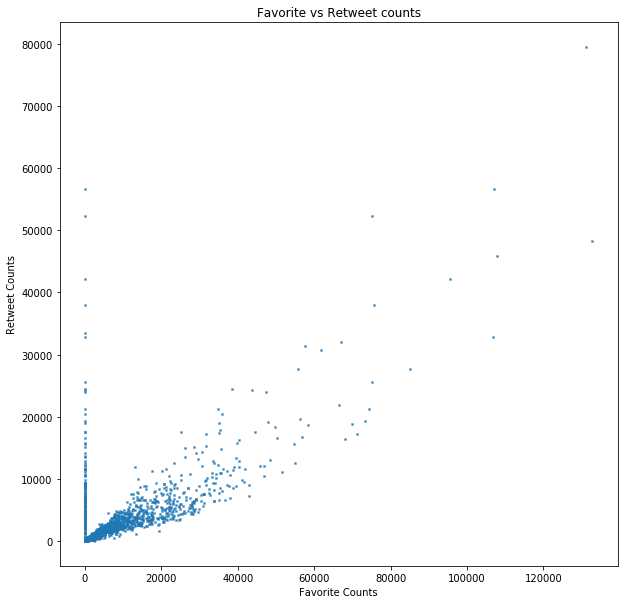

In [54]:
plt.figure(figsize = (10, 10))
plt.plot(df.favorite_count, df.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.show()

From the plot above, we could know that there seems to be a strong positive relationship between favourite and retweet.
